<a href="https://colab.research.google.com/github/d-atallah/implicit_gender_bias/blob/main/08_Supervised_Feature_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import, Download, & Variable Statements

In [ ]:
# Import & download statements
# General statements
import pandas as pd
import string
import re
import joblib
import os
import numpy as np
import time
import spacy
import scipy
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection & Model tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD,PCA, NMF, LatentDirichletAllocation
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, log_loss, make_scorer, average_precision_score
from sklearn.preprocessing import MinMaxScaler

# Model options
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# NLTK resources
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gibsonce/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gibsonce/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/gibsonce/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Read Inputs

In [ ]:
# Variables
folder_path = '/home/gibsonce/datallah-jaymefis-gibsonce/'

# Load DataFrames from pkl files
X_train = pd.read_pickle(folder_path + 'X_train_preprocessed_custom.pkl')
X_test = pd.read_pickle(folder_path + 'X_test_preprocessed_custom.pkl')
y_train = pd.read_pickle(folder_path + 'y_train_custom.pkl')
y_test = pd.read_pickle(folder_path + 'y_test_custom.pkl')

In [ ]:
# Filter X_train and X_test to remove NaN records
non_nan_indices_train = ~X_train.isnull()
non_nan_indices_test = ~X_test.isnull()

y_train = y_train[non_nan_indices_train]
y_test = y_test[non_nan_indices_test]

X_train = X_train[non_nan_indices_train]
X_test = X_test[non_nan_indices_test]

## Define Functions


In [ ]:
stop_words = {'a',
'about',
'above',
'after',
'again',
'against',
'ain',
'all',
'am',
'an',
'and',
'any',
'are',
'aren',
"aren't",
'as',
'at',
'be',
'because',
'been',
'before',
'being',
'below',
'between',
'both',
'but',
'by',
'can',
'couldn',
"couldn't",
'd',
'did',
'didn',
"didn't",
'do',
'does',
'doesn',
"doesn't",
'doing',
'don',
"don't",
'down',
'during',
'each',
'few',
'for',
'from',
'further',
'had',
'hadn',
"hadn't",
'has',
'hasn',
"hasn't",
'have',
'haven',
"haven't",
'having',
#'he',
#'her',
'here',
#'hers',
#'herself',
#'him',
#'himself',
#'his',
'how',
'i',
'if',
'in',
'into',
'is',
'isn',
"isn't",
'it',
"it's",
'its',
'itself',
'just',
'll',
'm',
'ma',
'me',
'mightn',
"mightn't",
'more',
'most',
'mustn',
"mustn't",
'my',
'myself',
'needn',
"needn't",
'no',
'nor',
'not',
'now',
'o',
'of',
'off',
'on',
'once',
'only',
'or',
'other',
'our',
'ours',
'ourselves',
'out',
'over',
'own',
're',
's',
'same',
'shan',
"shan't",
#'she',
#"she's",
'should',
"should've",
'shouldn',
"shouldn't",
'so',
'some',
'such',
't',
'than',
'that',
"that'll",
'the',
'their',
'theirs',
'them',
'themselves',
'then',
'there',
'these',
'they',
'this',
'those',
'through',
'to',
'too',
'under',
'until',
'up',
've',
'very',
'was',
'wasn',
"wasn't",
'we',
'were',
'weren',
"weren't",
'what',
'when',
'where',
'which',
'while',
'who',
'whom',
'why',
'will',
'with',
'won',
"won't",
'wouldn',
"wouldn't",
'y',
'you',
"you'd",
"you'll",
"you're",
"you've",
'your',
'yours',
'yourself',
'yourselves',
# Custom
'like',
'people',
'need',
'know',
'one',
'welcome',
'fitocracy',
'great',
'dont',
'thank',
'place',
'workout',
'question',
'get',
'help',
'keep',
'question',
'iphone',
'victoria',
'workout',
'icon',
'httpswwwfitocracycomgroup',
'megyn',
'rand',
'tyra',
'exercise',
'marco',
'congressman',
'gemma',
'elizabeth',
'zooey',
'montel',
'jane',
'tulsi',
'andrea',
'congresswoman',
'patty',
'mia',
'amy',
'katee',
'trey',
'geraldo',
'tim',
'tammy',
'kamala',
'mccain',
'brene',
'debbie',
'hermosa',
'warren',
'tom',
'jensen',
'katey',
'liz',
'peter',
'mitch',
'marsha',
'linda',
'arsenio',
'rubio',
'ron',
'hello',
'israel',
'booker',
'irs',
'lourdes',
'tu',
'kristi',
'group',
'constitution',
'impeach',
'bella',
'gillibrand',
'guideson',
'colton',
'jill',
'monica',
'john',
'kelly',
'hola',
'hi',
'gowdy',
'te',
'tara',
'obama',
'cathy',
'kim',
'fitness',
'httpbitlyipoxpon',
'paul',
'name',
'guy',
'que',
'paula',
'mi',
'ur',
'chris',
'morning',
'idea',
'ashley',
'lisa',
'susan',
'nancy',
'government',
'megan',
'murray',
'team',
     }

In [ ]:
def tokenize_and_categorize_batch(texts):
    docs = list(nlp.pipe(texts))
    word_features = [' '.join([token.text for token in doc]) for doc in docs]
    pos_tags = [' '.join([token.pos_ for token in doc]) for doc in docs]
    return word_features, pos_tags

## XGBoost

In [ ]:
# Define variables
model_type = 'xgb'
params = {
    'xgbclassifier': {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.5},
}

In [ ]:
train_batch_size = 10000

X_train_ = pd.Series(dtype='object')
X_train_pos = pd.Series(dtype='object')

train_iterator = (X_train.iloc[i:i+train_batch_size] for i in range(0, len(X_train), train_batch_size))

# Concatenate each batch of results
for train_batch in train_iterator:
    X_train_word_features, X_train_pos_tags = tokenize_and_categorize_batch(train_batch)
    X_train_ = pd.concat([X_train_, pd.Series(X_train_word_features)])
    X_train_pos = pd.concat([X_train_pos, pd.Series(X_train_pos_tags)])

X_train_.reset_index(drop=True, inplace=True)
X_train_pos.reset_index(drop=True, inplace=True)

In [ ]:
test_batch_size = 10000

X_test_ = pd.Series(dtype='object')
X_test_pos = pd.Series(dtype='object')

test_iterator = (X_test.iloc[i:i+test_batch_size] for i in range(0, len(X_test), test_batch_size))

# Concatenate each batch of results
for test_batch in test_iterator:
    X_test_word_features, X_test_pos_tags = tokenize_and_categorize_batch(test_batch)
    X_test_ = pd.concat([X_test_, pd.Series(X_test_word_features)])
    X_test_pos = pd.concat([X_test_pos, pd.Series(X_test_pos_tags)])

X_test_.reset_index(drop=True, inplace=True)
X_test_pos.reset_index(drop=True, inplace=True)

In [ ]:
# Vectorize the word features
word_features_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
X_train_word_features_ = word_features_vectorizer.fit_transform(X_train)
X_test_word_features_ = word_features_vectorizer.transform(X_test)

# Vectorize the parts of speech tags
pos_tags_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
X_train_pos_tags_ = pos_tags_vectorizer.fit_transform(X_train_pos)
X_test_pos_tags_ = pos_tags_vectorizer.transform(X_test_pos)

In [ ]:
# Combine the vectorized word features and parts of speech tags
X_train_combined = scipy.sparse.hstack([X_train_word_features_, X_train_pos_tags_])
X_test_combined = scipy.sparse.hstack([X_test_word_features_, X_test_pos_tags_])

In [ ]:
# Fit the model
model = XGBClassifier(random_state=42, **params.get('xgbclassifier', {}))
model.fit(X_train_combined, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Feature Importances

In [ ]:
# Create feature importances
feature_importances = model.feature_importances_
word_features = (word_features_vectorizer.get_feature_names_out())
feature_importance_dict = dict(zip(word_features, feature_importances))
feature_importance_dict = {word: importance for word, importance in feature_importance_dict.items() if word not in stop_words}

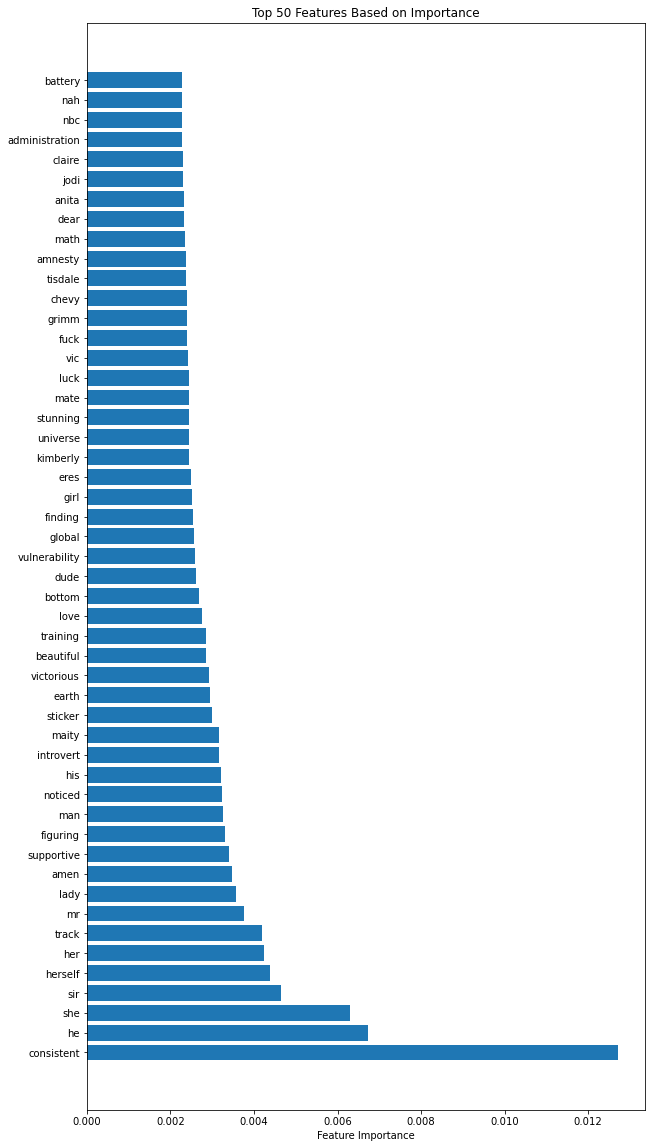

In [ ]:
feature_names, importance_values = zip(*feature_importance_dict.items())

# Sort features based on importance values in descending order
sorted_indices = sorted(range(len(importance_values)), key=lambda k: importance_values[k], reverse=True)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importance_values = [importance_values[i] for i in sorted_indices]

# Plot the top N features
top_n = 50
plt.figure(figsize=(10, 20))
plt.barh(range(top_n), sorted_importance_values[:top_n], align='center')
plt.yticks(range(top_n), sorted_feature_names[:top_n])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Features Based on Importance')
plt.show()

## Important Feature Error Analysis

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
misclassified_indices = np.where(y_test != model.predict(X_test_combined))[0]
misclassified_X_test = X_test_[misclassified_indices]
misclassified_y_test = y_test.iloc[misclassified_indices]
preds = model.predict(X_test_combined)

In [ ]:
lookup = 'he'
lookup_index = misclassified_X_test.apply(lambda row: lookup in row)
misclassified_lookup = misclassified_X_test[lookup_index]
#misclassified_lookup

In [ ]:
example_index_in_original = X_test_[X_test_.apply(lambda row: lookup in row).index == 12].index[0]
ex_label = y_test.iloc[example_index_in_original]
ex_pred = preds[example_index_in_original]

print(f"True Label: {ex_label}, Predicted Label: {ex_pred}")
print("Example:")
print(X_test_.iloc[example_index_in_original])

True Label: 0.0, Predicted Label: 1
Example:
president job write program cyber security he continue working fix problem program work giving job congress make american safe president responsibility alone president working poor middle class word job moving america forward instead worrying right wing base


In [ ]:
lookup = 'she'
lookup_index = misclassified_X_test.apply(lambda row: lookup in row)
misclassified_lookup = misclassified_X_test[lookup_index]
#misclassified_lookup

In [ ]:
example_index_in_original = X_test_[X_test_.apply(lambda row: lookup in row).index == 190061].index[0]
ex_label = y_test.iloc[example_index_in_original]
ex_pred = preds[example_index_in_original]

print(f"True Label: {ex_label}, Predicted Label: {ex_pred}")
print("Example:")
print(X_test_.iloc[example_index_in_original])

True Label: 1.0, Predicted Label: 0
Example:
cheated perhaps even threatened presidency clinton screwed big time she known fair trump better alternative today clinton charge world would come swift harsh end american nonamericans alike she start raining nuclear bomb continent


In [ ]:
example_index_in_original = X_test_[X_test_.apply(lambda row: lookup in row).index == 190318].index[0]
ex_label = y_test.iloc[example_index_in_original]
ex_pred = preds[example_index_in_original]

print(f"True Label: {ex_label}, Predicted Label: {ex_pred}")
print("Example:")
print(X_test_.iloc[example_index_in_original])

True Label: 1.0, Predicted Label: 0
Example:
send prayer sympathy she lovely dedicated southern lady gifted educator god bless


## BOW Error Analysis

### Misclassified BOW

In [ ]:
# Clone the original vectorizer and fit it to the misclassified samples
misclassified_indices = np.where(y_test != model.predict(X_test_combined))[0]
misclassified_samples = X_test_combined.tocsc()[misclassified_indices].tocsc()

misclassified_features = (word_features_vectorizer.inverse_transform(misclassified_samples[:, :X_test_word_features_.shape[1]]))
misclassified_pos = (pos_tags_vectorizer.inverse_transform(misclassified_samples[:, X_test_word_features_.shape[1]:]))

# Combine misclassified feature names into a bag of words
misclassified_bow = [' '.join(features) for features in misclassified_features]
misclassified_pos_bow = [' '.join(features) for features in misclassified_pos]

### Classified BOW

In [ ]:
# Above process is to computationally expensive for classified examples. Batch process was needed.
batch_size = 100
classified_indices = np.where(y_test == model.predict(X_test_combined))[0]
total_samples = len(classified_indices)

# Store results
all_batch_bow = []
all_batch_pos_bow = []

for i in range(0, total_samples, batch_size):
    print(i)
    batch_indices = classified_indices[i:i+batch_size]
    batch_samples = X_test_combined.tocsc()[batch_indices].tocsc()

    batch_features = word_features_vectorizer.inverse_transform(batch_samples[:, :X_test_word_features_.shape[1]])
    batch_pos = pos_tags_vectorizer.inverse_transform(batch_samples[:, X_test_word_features_.shape[1]:])

    batch_bow = [' '.join(features) for features in batch_features]
    batch_pos_bow = [' '.join(features) for features in batch_pos]

    all_batch_bow.extend(batch_bow)
    all_batch_pos_bow.extend(batch_pos_bow)

### Write Pipeline to Shared Drive

In [ ]:
# Convert to dataframe
misclassified_df = pd.DataFrame(misclassified_bow)
misclassified_pos_df = pd.DataFrame(misclassified_pos_bow)

classified_df = pd.DataFrame(all_batch_bow)
classified_pos_df = pd.DataFrame(all_batch_pos_bow)

# Save the necessary files
misclassified_df.to_csv('misclassified_bow.csv', index=False)
misclassified_pos_df.to_csv('misclassified_pos_bow.csv', index=False)

classified_df.to_csv('classified_bow.csv', index=False)
classified_pos_df.to_csv('classified_pos_bow.csv', index=False)

joblib.dump(pos_tags_vectorizer, folder_path+'pos_tags_vectorizer.joblib')
joblib.dump(X_test_pos_tags_, folder_path+'X_test_pos_tags.joblib')

### Read Saved Pipeline Files

In [ ]:
# Load CSV files into DataFrames
misclassified_df = pd.read_csv('misclassified_bow.csv')
misclassified_pos_df = pd.read_csv('misclassified_pos_bow.csv')

classified_df = pd.read_csv('classified_bow.csv')
classified_pos_df = pd.read_csv('classified_pos_bow.csv')

# Load joblib files
pos_tags_vectorizer = joblib.load(folder_path + 'pos_tags_vectorizer.joblib')
X_test_pos_tags_ = joblib.load(folder_path + 'X_test_pos_tags.joblib')

In [ ]:
# Combine bag of words for classified/misclassified
misc_pos_text = ' '.join(misclassified_pos_df.astype(str).to_numpy().flatten())
cor_pos_text = ' '.join(classified_pos_df.to_numpy().astype(str).flatten())

misc_text = ' '.join(misclassified_df.to_numpy().astype(str).flatten())
cor_text = ' '.join(classified_df.to_numpy().astype(str).flatten())

# Remove stop words
filtered_misc_tokens = ' '.join([word for word in misc_text.split() if word not in stop_words])
filtered_cor_tokens = ' '.join([word for word in cor_text.split() if word not in stop_words])

In [ ]:
# Combine bag of words for the full corpus
overall_dataset_pos_bow = pos_tags_vectorizer.inverse_transform(X_test_pos_tags_)
combined_overall_pos_text = ' '.join([' '.join(features) for features in overall_dataset_pos_bow])

### Visualize Normalized Feature & POS Frequencies

In [ ]:
# POS Frequencies
misc_pos_tokens = misc_pos_text.split()
cor_pos_tokens = cor_pos_text.split()
overall_tokens = combined_overall_pos_text.split()

misc_pos_counts = pd.Series(misc_pos_tokens).value_counts()
cor_pos_counts = pd.Series(cor_pos_tokens).value_counts()

overall_pos_frequencies = X_test_pos_tags_.sum(axis=0)
overall_pos_counts = pd.Series(overall_pos_frequencies.A1, index=pos_tags_vectorizer.get_feature_names_out())

# Compare the distributions
pos_tags_comparison = pd.DataFrame({
    'Misclassified': misc_pos_counts,
    'Classified': cor_pos_counts,
    'Overall': overall_pos_counts
})

pos_tags_comparison['Misclassified_normalized'] = pos_tags_comparison['Misclassified'] / pos_tags_comparison['Overall']
pos_tags_comparison['Classified_normalized'] = pos_tags_comparison['Classified'] / pos_tags_comparison['Overall']
pos_tags_comparison = pos_tags_comparison.dropna()
pos_tags_comparison.sort_values(by='Misclassified_normalized', ascending=False)

,Misclassified,Classified,Overall,Misclassified_normalized,Classified_normalized
adp,9476,23331,6905.001228,1.372339,3.378855
aux,17477,44636,14466.720454,1.208083,3.085426
sconj,3320,10067,2852.827879,1.163758,3.528779
part,8215,22689,7716.764809,1.064565,2.940222
det,2114,6630,1987.415175,1.063693,3.335991
num,5186,15070,4910.556118,1.056092,3.068899
cconj,792,2343,805.758745,0.982924,2.907818
intj,11875,22504,12450.888171,0.953747,1.807421
adv,23186,57808,25725.095994,0.901299,2.247144
pron,17305,45743,19395.996908,0.892194,2.358373


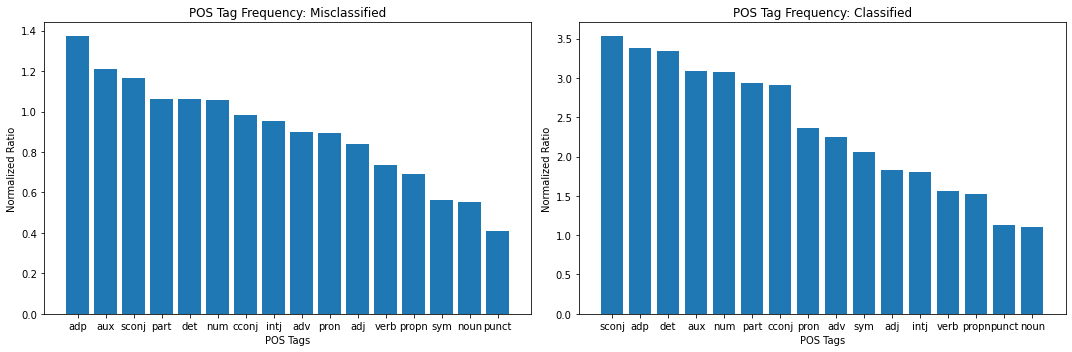

In [ ]:
labels = ['Misclassified', 'Classified']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.ravel()

for i, label in enumerate(labels):
    normalized_columns = [f'{label}_normalized', 'Overall']
    normalized_data = pos_tags_comparison[normalized_columns]

    top_tags = normalized_data.sort_values(by=f'{label}_normalized', ascending=False)

    axs[i].bar(top_tags.index, top_tags[f'{label}_normalized'])
    axs[i].set_title(f'POS Tag Frequency: {label}')
    axs[i].set_ylabel('Normalized Ratio')
    axs[i].set_xlabel('POS Tags')

plt.tight_layout()
plt.show()

### Min Max Scaling

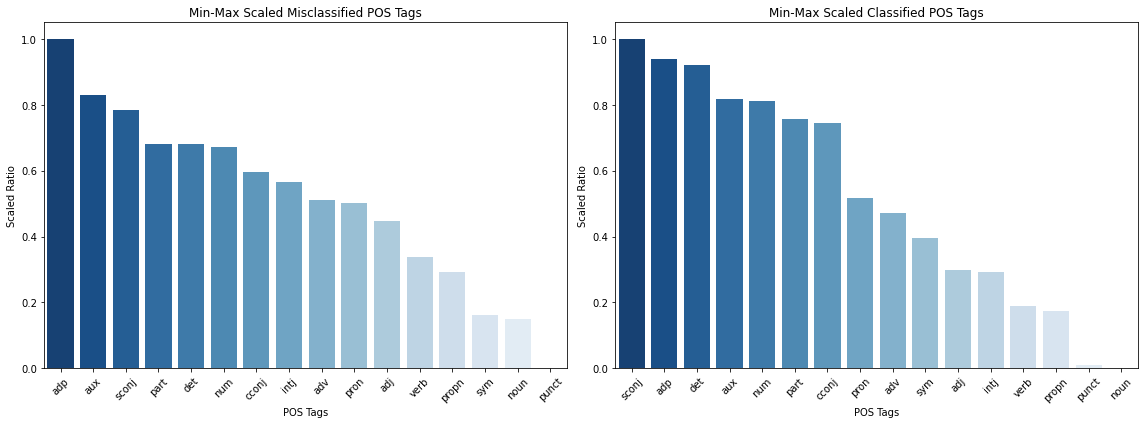

In [ ]:
categories = ['Misclassified', 'Classified']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for i, category in enumerate(categories):
    # Extract relevant data for the category
    category_ratios = pos_tags_comparison[f'{category}_normalized'].values.reshape(-1, 1)

    # Create and apply Min-Max scaler
    scaler = MinMaxScaler()
    category_ratios_scaled = scaler.fit_transform(category_ratios)

    # Update the DataFrame with the scaled values
    pos_tags_comparison[f'{category}_normalized_scaled'] = category_ratios_scaled
    sorted_comparison = pos_tags_comparison.sort_values(by=f'{category}_normalized_scaled', ascending=False)

    # Plot Min-Max Scaled POS Tags in subplots
    sns.barplot(x=sorted_comparison.index, y=f'{category}_normalized_scaled', data=sorted_comparison, palette='Blues_r', ax=axes[i])
    axes[i].set_title(f'Min-Max Scaled {category} POS Tags')
    axes[i].set_xlabel('POS Tags')
    axes[i].set_ylabel('Scaled Ratio')

    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Visualize Most Frequent Features

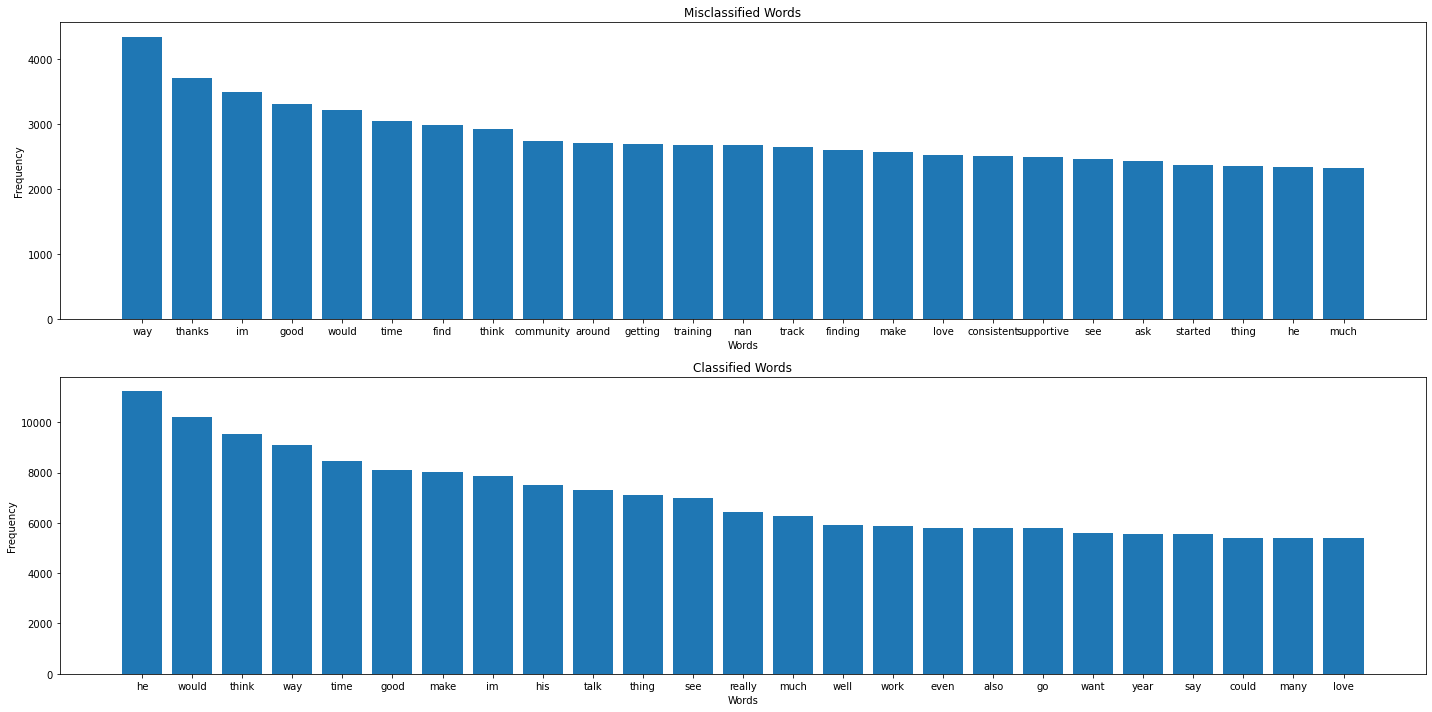

In [ ]:
# List of text objects
text_objects = [filtered_misc_tokens, filtered_cor_tokens]
labels = ['Misclassified Words', 'Classified Words']

fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs = axs.ravel()

for i, text_obj in enumerate(text_objects):
    tokens = text_obj.split()
    counts = pd.Series(tokens).value_counts()

    # Plot the top N words
    top_freq = counts.head(25)

    axs[i].bar(top_freq.index, top_freq.values)
    axs[i].set_title(f'{labels[i]}')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlabel('Features')

plt.tight_layout()
plt.show()

## Topic Modeling

In [ ]:
# Remove stop words from BOW
custom_stop_words_list = list(stop_words)
vectorizer = CountVectorizer(stop_words=custom_stop_words_list, lowercase=True)
tokens = misc_text.split()
misclassified_counts = vectorizer.fit_transform(tokens)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
misclassified_topics = lda.fit_transform(misclassified_counts)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
print("Top words for each topic:")
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-5 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Top words for each topic:
Topic #1: would, make, back, work, ya
Topic #2: way, im, getting, track, he
Topic #3: good, find, around, training, love
Topic #4: thanks, community, nan, finding, go
Topic #5: time, think, consistent, thing, well


In [ ]:
# Remove stop words from BOW
vectorizer = CountVectorizer(stop_words=custom_stop_words_list, lowercase=True)
tokens = cor_text.split()
classified_counts = vectorizer.fit_transform(tokens)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
classified_topics = lda.fit_transform(classified_counts)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
print("Top words for each topic:")
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-5 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Top words for each topic:
Topic #1: way, good, talk, work, also
Topic #2: time, even, could, world, better
Topic #3: think, make, his, thing, really
Topic #4: he, see, many, right, thanks
Topic #5: would, im, much, go, love
